In [9]:
%pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     \ 306.0 kB 379.6 kB/s 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for mpl-finance: started
  Running setup.py install for mpl-finance: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: mpl-finance is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


In [10]:
%pip install --upgrade mplfinance

  Using cached mplfinance-0.12.9b5-py3-none-any.whl (71 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing necessary python libraries for this project
import pandas as pd
import numpy as np
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [13]:
df = pd.read_csv('C:/Users/Amrit/Intilt/Intrade_ai/Data/Nifty/nifty_1day_continous.csv')
df = df.set_index("datetime")
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].apply(mpl_dates.date2num)
df = df.loc[:,['Date', 'open', 'high', 'low', 'close']]
df

,Date,open,high,low,close
datetime,,,,,
2007-01-02,13515.0,3966.25,4016.65,3964.95,4007.40
2007-01-03,13516.0,4007.70,4029.80,3985.00,4024.05
2007-01-04,13517.0,4027.30,4041.00,3979.80,3988.80
2007-01-05,13518.0,3990.15,4011.45,3969.65,3983.40
2007-01-08,13521.0,3983.30,3987.45,3913.00,3933.40
...,...,...,...,...,...
2022-11-01,19297.0,18130.70,18175.80,18060.15,18145.40
2022-11-02,19298.0,18177.90,18178.75,18048.65,18082.85
2022-11-03,19299.0,17968.35,18106.30,17959.20,18052.70


C:\Users\Amrit\AppData\Local\Temp\ipykernel_9740\1724565063.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


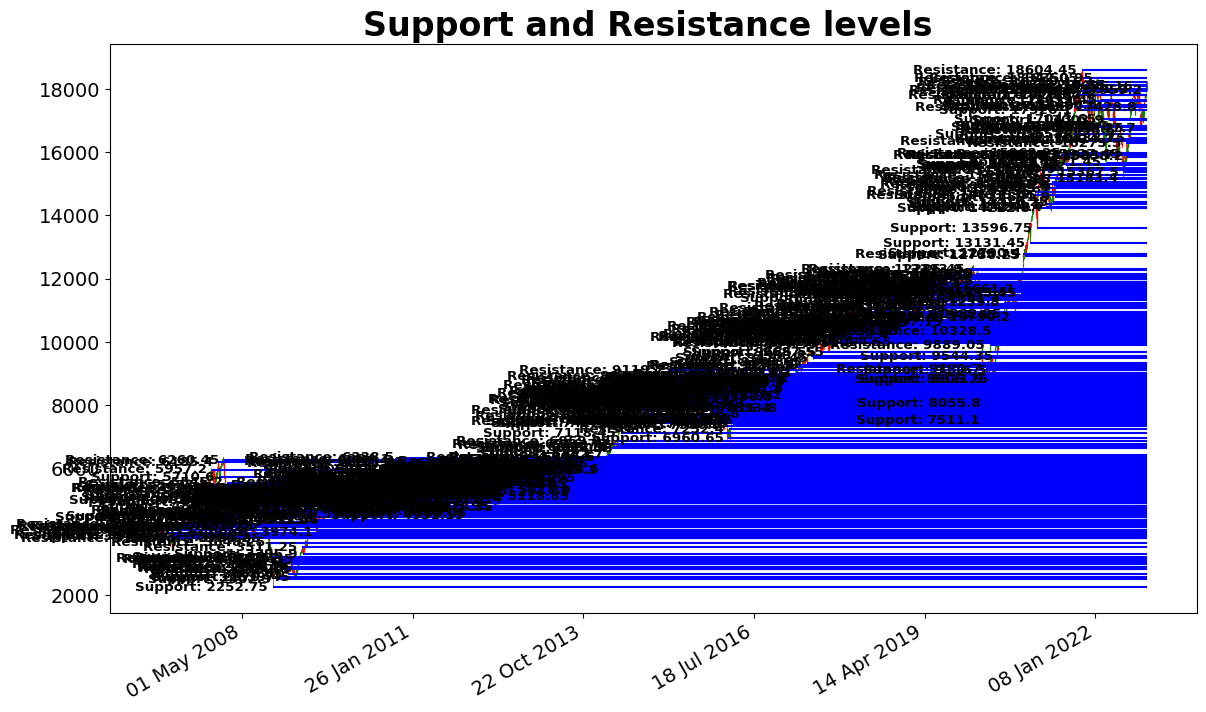

In [14]:
# Create two functions to calculate if a level is SUPPORT or a RESISTANCE level through fractal identification
def is_Suppport_Level(df, i):
  support = df['low'][i] < df['low'][i - 1] and df['low'][i] < df['low'][i + 1] and df['low'][i + 1] < df['low'][i + 2] and df['low'][i - 1] < df['low'][i - 2]
  return support


def is_Resistance_Level(df, i):
  resistance = df['high'][i] > df['high'][i - 1] and df['high'][i] > df['high'][i + 1] and df['high'][i + 1] > df['high'][i + 2] and df['high'][i - 1] > df['high'][i - 2]
  return resistance

# Creating a list and feeding it the identified support and resistance levels via the Support and Resistance functions
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):

  if is_Suppport_Level(df, i):
    levels.append((i, df['low'][i].round(2)))
    level_types.append('Support')

  elif is_Resistance_Level(df, i):
    levels.append((i, df['high'][i].round(2)))
    level_types.append('Resistance')

# Plotting the data
def plot_levels():
  fig, ax = plt.subplots()
  candlestick_ohlc(ax, df.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  fig.tight_layout()

  for level, level_type in zip(levels, level_types):
    plt.hlines(level[1],
               xmin = df['Date'][level[0]],
               xmax = max(df['Date']),
               colors = 'blue')
    plt.text(df['Date'][level[0]], level[1], (str(level_type) + ': ' + str(level[1]) + ' '), ha='right', va='center', fontweight='bold', fontsize='x-small')
    plt.title('Support and Resistance levels', fontsize=24, fontweight='bold')
    fig.show()

plot_levels()

In [16]:
# Clean noise in data by discarding a level if it is near another
# (i.e. if distance to the next level is less than the average candle size for any given day - this will give a rough estimate on volatility)
mean = np.mean(df['high'] - df['low'])

# This function, given a price value, returns True or False depending on if it is too near to some previously discovered key level.
def distance_from_mean(level):
  return np.sum([abs(level - y) < mean for y in levels]) == 0

C:\Users\Amrit\AppData\Local\Temp\ipykernel_9740\1724565063.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


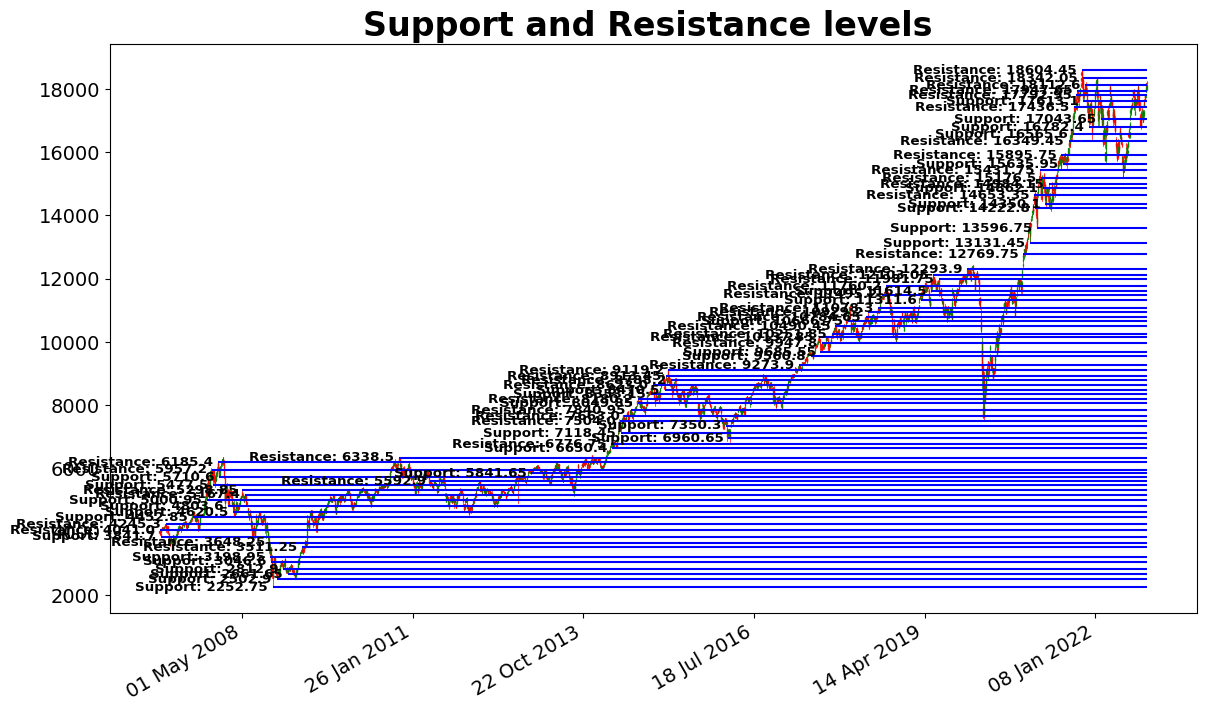

In [17]:
# Optimizing the analysis by adjusting the data and eliminating the noise from volatility that is causing multiple levels to show/overlapp
levels = []
level_types = []
for i in range(2, df.shape[0] - 2):

  if is_Suppport_Level(df, i):
    level = df['low'][i].round(2)

    if distance_from_mean(level):
      levels.append((i, level))
      level_types.append('Support')

  elif is_Resistance_Level(df, i):
    level = df['high'][i].round(2)

    if distance_from_mean(level):
      levels.append((i, level))
      level_types.append('Resistance')
      
plot_levels()